In [64]:
import numpy as np
import pandas as pd
import plotly as py
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.figure_factory import create_distplot
import statsmodels.formula.api as smf
from statsmodels.graphics.gofplots import ProbPlot
py.offline.init_notebook_mode(connected=True)
%matplotlib inline

## New York City Airbnb EDA

#User search main screen (filters/buttons):	
#number of people traveling
#Dates
#Price range
#Quality of home (“Fair”, “Good”, “Excellent”, “Extravagant”)
#Quality of food (“Fair”, “Good”, “Excellent”, “Extravagant”)
#Optional: Specific city (drop down menu with search)
#Optional: Activities (check mark boxes “Beach”, “Snow”, “Culture”)
#Optional: Notify me when price drops below defined threshold.
#Click “Search”
#Stretch goal,  NLP keyword matching (“surfing”, “scuba”), word2vec, doc2vec
#App filters on city, home, dates, price, activities then automatically
#App looks for trends in data to create home price range (fair, good) for Airbnb, and Hotel,
#Base goal is basic stats based on city, *Stretch goal, price trends across year/week/day/hour
#App updates from Airbnb for 10 major cities once every 5 days 


In [65]:
neededfeatures = ['accomodates', 'date', 'price', 'market', 'room_type', 'property_type',
                 'guests_included', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 
                 'review_scores_rating', 'review_scores_accuracy','review_scores_cleanliness', 'review_scores_checkin', 
                  'review_scores_communication', 'review_scores_location', 'review_scores_value']



In [67]:
#Columns (43,61,62,88) have mixed types. Specify dtype option on import or set low_memory=False.
listingdf = pd.read_csv('./Datasets/2018_NY_March_listings.csv')

/Users/wenchang_qian/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning:

Columns (43,61,62,88) have mixed types. Specify dtype option on import or set low_memory=False.



In [68]:
reviewdf = pd.read_csv('./Datasets/2018_NY_March_reviews.csv')

In [69]:
avaidf = pd.read_csv('./Datasets/2018_NY_March_calendar.csv')

In [70]:
nylisting = listingdf.copy()
nyrv = reviewdf.copy()
nyavail = avaidf.copy()

In [71]:
#check missingness

nylisting.isnull().sum().sort_values(ascending = False)

xl_picture_url                      48852
license                             48852
medium_url                          48852
thumbnail_url                       48852
host_acceptance_rate                48852
jurisdiction_names                  48846
square_feet                         48319
monthly_price                       42146
weekly_price                        40653
notes                               30467
interaction                         21506
security_deposit                    20751
access                              20376
neighborhood_overview               20010
house_rules                         19593
host_about                          19072
transit                             18461
host_response_time                  17530
host_response_rate                  17530
space                               15651
cleaning_fee                        12985
review_scores_location              12036
review_scores_value                 12035
review_scores_checkin             

In [72]:
nylisting.shape

(48852, 96)

In [98]:
nylisting = nylisting.drop(['xl_picture_url', 'license', 'medium_url', 'thumbnail_url', 'jurisdiction_names', 
                  'square_feet', 'host_acceptance_rate', 'scrape_id'], axis = 1)

In [99]:
nylisting.shape

(48852, 88)

In [100]:
nylisting.isnull().sum().sort_values(ascending = False).head(50)

monthly_price                  42146
weekly_price                   40653
notes                          30467
interaction                    21506
security_deposit               20751
access                         20376
neighborhood_overview          20010
house_rules                    19593
host_about                     19072
transit                        18461
host_response_time             17530
host_response_rate             17530
space                          15651
cleaning_fee                   12985
review_scores_location         12036
review_scores_value            12035
review_scores_checkin          12017
review_scores_accuracy         11982
review_scores_communication    11966
review_scores_cleanliness      11959
review_scores_rating           11906
reviews_per_month              10936
first_review                   10936
last_review                    10880
host_neighbourhood              6821
summary                         1388
zipcode                          680
h

In [101]:
nylisting.columns

Index(['id', 'listing_url', 'last_scraped', 'name', 'summary', 'space',
       'description', 'experiences_offered', 'neighborhood_overview', 'notes',
       'transit', 'access', 'interaction', 'house_rules', 'picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price',
       'weekly_price', 'monthly_price'

In [102]:
nylisting.describe()

,id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
count,4.885200e+04,4.885200e+04,48746.000000,48746.000000,48852.000000,48852.000000,48852.000000,48713.000000,48796.000000,48783.000000,...,48852.000000,36946.000000,36870.000000,36893.000000,36835.000000,36886.000000,36816.000000,36817.000000,48852.000000,37916.000000
mean,1.306129e+07,4.244835e+07,2.353998,2.353998,40.729870,-73.953972,2.806252,1.132942,1.153332,1.554271,...,18.468701,93.559763,9.575481,9.242865,9.726510,9.744402,9.473300,9.395225,1.732662,1.270184
std,7.237647e+06,4.734590e+07,14.940470,14.940470,0.053681,0.042826,1.854822,0.422285,0.720191,1.066984,...,34.840286,8.613030,0.837229,1.098405,0.721735,0.706373,0.810527,0.891648,2.226065,1.541334
min,2.515000e+03,2.830000e+02,0.000000,0.000000,40.499794,-74.240843,1.000000,0.000000,0.000000,1.000000,...,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.010000
25%,6.883774e+06,6.058278e+06,1.000000,1.000000,40.691163,-73.983349,2.000000,1.000000,1.000000,1.000000,...,1.000000,91.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000,0.240000
50%,1.381267e+07,2.293314e+07,1.000000,1.000000,40.723343,-73.956218,2.000000,1.000000,1.000000,1.000000,...,4.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,0.680000
75%,1.986528e+07,6.255657e+07,2.000000,2.000000,40.763774,-73.938629,4.000000,1.000000,1.000000,2.000000,...,19.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,1.820000
max,2.359801e+07,1.764417e+08,990.000000,990.000000,40.911774,-73.711750,16.000000,17.000000,14.000000,40.000000,...,521.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,35.000000,39.080000


In [103]:
nylisting.review_scores_cleanliness

0         9.0
1        10.0
2         9.0
3        10.0
4         NaN
5         9.0
6         9.0
7         8.0
8         8.0
9        10.0
10        9.0
11        7.0
12       10.0
13        9.0
14        9.0
15        8.0
16        9.0
17        9.0
18        9.0
19        9.0
20       10.0
21       10.0
22       10.0
23        8.0
24       10.0
25        9.0
26        9.0
27        9.0
28        9.0
29        9.0
         ... 
48822     NaN
48823     NaN
48824     NaN
48825     NaN
48826     NaN
48827     NaN
48828     NaN
48829     NaN
48830     NaN
48831     NaN
48832     NaN
48833     NaN
48834     NaN
48835     NaN
48836     NaN
48837     NaN
48838     NaN
48839     NaN
48840     NaN
48841     NaN
48842     NaN
48843     NaN
48844     NaN
48845     NaN
48846     NaN
48847     NaN
48848     NaN
48849     NaN
48850     NaN
48851     NaN
Name: review_scores_cleanliness, Length: 48852, dtype: float64

In [104]:
import missingno as msno

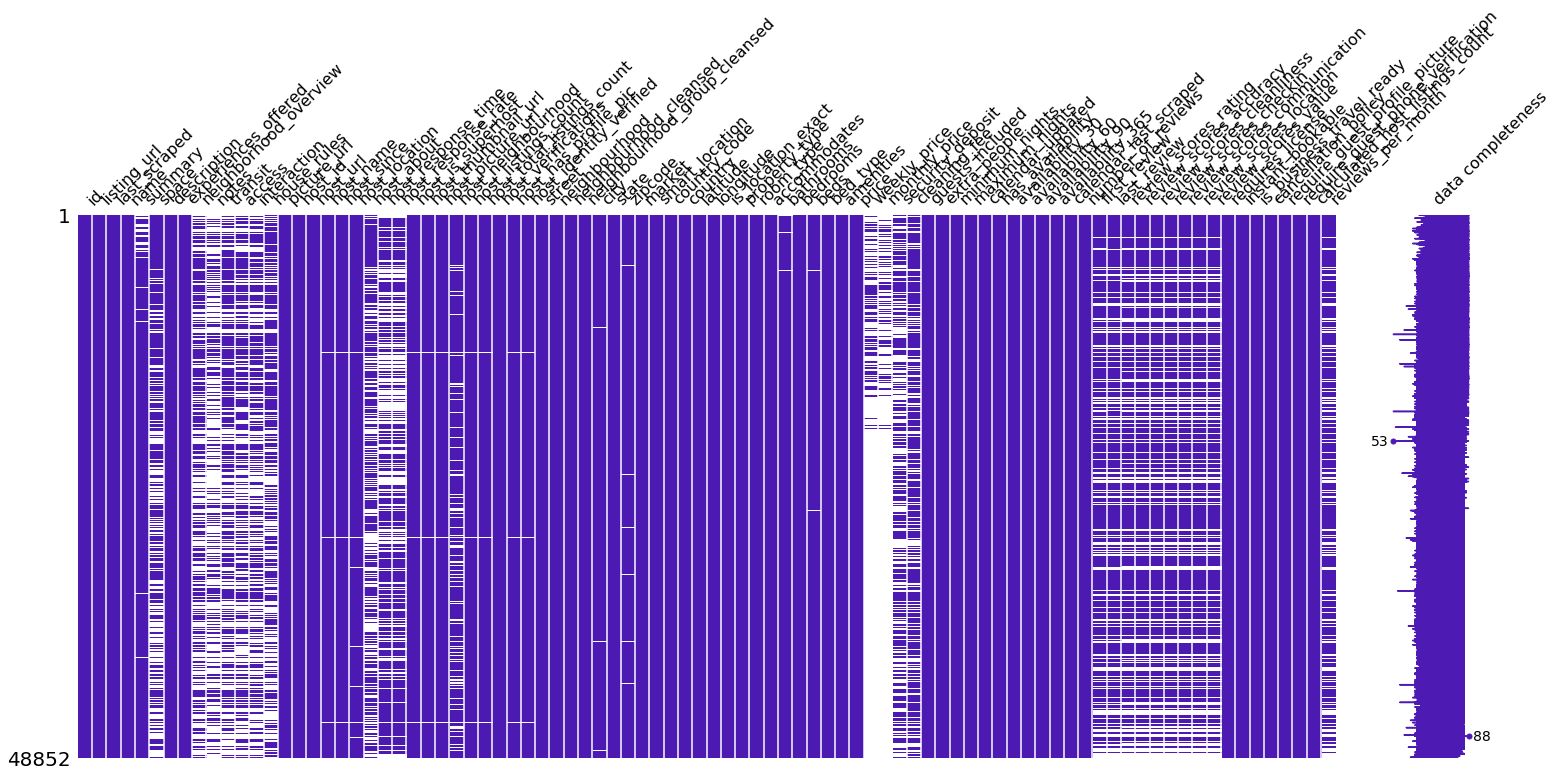

In [105]:
msno.matrix(nylisting, color=(0.3, 0.1, 0.7), labels = True)

In [106]:
nyrv.shape


(895353, 6)

In [107]:
nyrv.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2515,198,2008-10-13,2603,Jenny,Stephanie was a wonderful host! Her apartment ...
1,2515,859,2009-03-08,8455,Roland,Such a wonderful place and very close to the m...
2,2515,1083,2009-03-25,9759,Cem,I just got back from a trip to NYC during whic...
3,2515,1107,2009-03-27,9193,Holly,Stephanie's offered all the most important thi...
4,2515,2175,2009-05-09,7048,Alessandra,"Stephanie was really nice, ftiendly and helpfu..."


In [108]:
nyrv.isnull().sum()

listing_id       0
id               0
date             0
reviewer_id      0
reviewer_name    0
comments         0
dtype: int64

In [109]:
#dropping the rows that don't have comments
nyrv = ny2018marchrv[ny2018marchrv.comments.notnull()]

In [110]:
nyrv.shape

(895353, 6)

In [111]:
nyrv.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')

In [112]:
nylisting.id

0            2515
1            2539
2            2595
3            3330
4            3647
5            3831
6            4989
7            5054
8            5121
9            5136
10           5172
11           5178
12           5203
13           5238
14           5295
15           5435
16           5441
17           5803
18           5945
19           6090
20           6848
21           6990
22           7097
23           7241
24           7322
25           7801
26           7816
27           8024
28           8025
29           8110
           ...   
48822    23584587
48823    23585804
48824    23586315
48825    23589335
48826    23589671
48827    23590172
48828    23591073
48829    23591706
48830    23593105
48831    23593269
48832    23593409
48833    23593484
48834    23593582
48835    23593710
48836    23593843
48837    23594177
48838    23594683
48839    23594848
48840    23595013
48841    23595101
48842    23595289
48843    23595602
48844    23596011
48845    23596025
48846    2

In [113]:
len(pd.unique(nyrv.listing_id))

37908

In [114]:
len(pd.unique(nyrv.id))

895353

In [115]:
# ny2018merge = ny2018march.merge(ny2018marchrv, how = 'outer', left_on = 'id', right_on = 'listing_id')
# ny2018merge

In [116]:
# ny2018merge.isnull().sum().sort_values(ascending = False).head(60)

In [117]:
nylisting.select_dtypes(include = ['object']).columns

Index(['listing_url', 'last_scraped', 'name', 'summary', 'space',
       'description', 'experiences_offered', 'neighborhood_overview', 'notes',
       'transit', 'access', 'interaction', 'house_rules', 'picture_url',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'is_location_exact',
       'property_type', 'room_type', 'bed_type', 'amenities', 'price',
       'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee',
       'extra_people', 'calendar_updated', 'has_availability',
       'calendar_last_scraped', 'first_review', 'last_review',


In [118]:
len(nylisting.select_dtypes(include = ['object']).columns)

61

In [119]:
pd.unique(nylisting.has_availability)

array(['t'], dtype=object)

In [120]:
nylisting.select_dtypes(exclude = ['object']).columns

Index(['id', 'host_id', 'host_listings_count', 'host_total_listings_count',
       'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'guests_included', 'minimum_nights', 'maximum_nights',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',
       'calculated_host_listings_count', 'reviews_per_month'],
      dtype='object')

In [121]:
len(nylisting.select_dtypes(exclude = ['object']).columns)

27

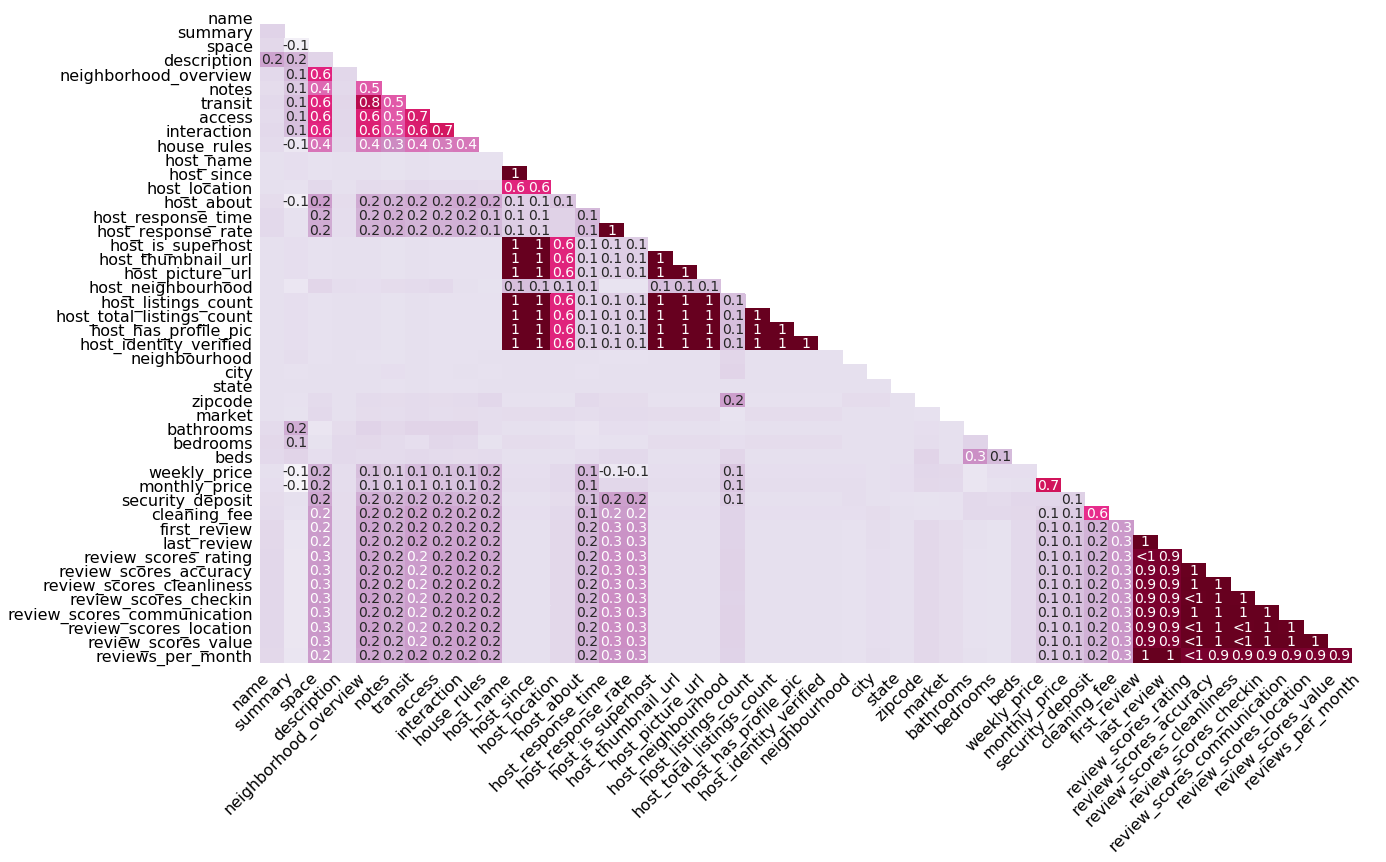

In [122]:
msno.heatmap(ny2018march, cmap = 'PuRd')

In [123]:
#this dataframe has no missingness
nyavail.head(15)

,listing_id,date,available,price
0,11675715,2019-01-30,t,$85.00
1,11675715,2019-01-29,t,$85.00
2,11675715,2019-01-28,t,$85.00
3,11675715,2019-01-27,t,$85.00
4,11675715,2019-01-26,t,$85.00
5,11675715,2019-01-25,t,$85.00
6,11675715,2019-01-24,t,$85.00
7,11675715,2019-01-23,t,$85.00
8,11675715,2019-01-22,t,$85.00
9,11675715,2019-01-21,t,$85.00


In [124]:
len(pd.unique(nyavail.listing_id))

48852

In [125]:
len(nyavail)

17830980

In [126]:
# pd.DataFrame(columns = ny2018avail.date)